In [ ]:
import numpy as np
import pandas as pd
import sys, os, subprocess  
import matplotlib.pyplot as plt
from dataclasses import dataclass, field

import matplotlib.pyplot as plt
import seaborn as sns

DataSet = pd.DataFrame()
DataSet = pd.read_csv("ClusterSet_26Hz.csv")


id_interst: list = field(default_factory= list)
id_interst = [ 
    3, 4, 7, 89, 104, 135, 157, 163,
    176,189, 190, 204, 219, 231, 258,
    271, 277, 286, 289, 299, 332, 344,
    4447, 13992, 23994, 35788, 45321, 
    57752, 62697, 69220, 69433, 79073
]


In [2]:
plt.style.use('dark_background')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

In [3]:
DataSet.drop(DataSet.columns[[0]], axis =1, inplace=True)
DataSet.head()

,breath_id,time_step,TV-i,TV-e,pressure,Polynomial_Area
0,1.0,0.000000,0.083334,0.0,5.837492,272.354053
1,1.0,0.033652,18.383041,0.0,5.907794,272.354053
2,1.0,0.067514,22.509278,0.0,7.876254,272.354053
3,1.0,0.101542,22.808822,0.0,11.742872,272.354053
4,1.0,0.135756,25.355850,0.0,12.234987,272.354053


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

def plot_hysteresis(hysteresis_dynamics):
    """
    Plots a hysteresis loop for the given data dictionary with a dark theme using Seaborn.
    
    Parameters:
    - hysteresis_dynamics: Dictionary containing 'TV-i', 'TV-e', and 'pressure' as lists.
    """
    # Set a Seaborn dark style with customizations for darker aesthetics
    sns.set_theme(style="white", rc={"axes.facecolor": "#1c1c1c", "grid.color": "#333333", "figure.facecolor": "#1c1c1c"})

    # Extract TV_i, TV_e, and pressure, then calculate TV_total
    TV_i = np.array(hysteresis_dynamics['TV-i'])
    TV_e = np.array(hysteresis_dynamics['TV-e'])
    pressure = np.array(hysteresis_dynamics['pressure'])
    TV_total = TV_i + TV_e

    # Initialize the figure and axes with a dark background
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set up the plot title and labels
    ax.set_title('Hysteresis Loop: TV-total/Pressure - 32.0 Hz', fontsize=16, color="white", pad=15)
    ax.set_xlabel('TV-total (TV-i + TV-e)', fontsize=14, color="white")
    ax.set_ylabel('Pressure', fontsize=14, color="white")
    
    # Adjust tick colors to white for visibility on the dark background
    plt.xticks(color="white")
    plt.yticks(color="white")

    # Initialize the line object
    line, = ax.plot([], [], marker='o', linestyle='-', color='cyan', label='Hysteresis (TV-total / Pressure)')

    # Show legend in the upper right corner with white text on dark background
    legend = ax.legend(facecolor="black", edgecolor="white", fontsize=12, loc='upper right')  # Change 'loc' to place the legend
    for text in legend.get_texts():
        text.set_color("white")

    # Loop through the data to create the plot
    for i in range(len(TV_total)):
        # Update the line data
        line.set_data(TV_total[:i+1], pressure[:i+1])
        ax.relim()          
        ax.autoscale_view() 
        fig.canvas.draw()   
        fig.canvas.flush_events() 

    plt.ioff()  # Turn off interactive mode
    plt.show()

# Example usage:
# Assuming Hysteresis_Dynamics is a dictionary with lists for 'TV-i', 'TV-e', and 'pressure'
# plot_hysteresis(Hysteresis_Dynamics)


In [ ]:
def Draw_Reconstructed_Cycles(breath_id: int, DataSet: pd.DataFrame):
    Random_ids = pd.DataFrame()
    Random_ids = DataSet[DataSet['breath_id'] == breath_id].copy()
    Random_ids = Random_ids.sort_values(by="time_step")

    Hysteresis_Dynamics: dict = field(default_factory=dict)
    target_columns = ["TV-i", "TV-e","pressure","time_step"]

    Hysteresis_Dynamics = Random_ids[target_columns].to_dict(orient ='list')
    plot_hysteresis(Hysteresis_Dynamics)

In [6]:
def HeatMap(DataSet: pd.DataFrame):
    sns.heatmap(DataSet.corr(), annot=True)
    plt.show()

def Draw_Feature(DataSet: pd.DataFrame, id: int, target: str):
    plt.figure(figsize=(14, 6))
    Random_id = DataSet[DataSet['breath_id'] == id].copy()
    Random_id = Random_id.sort_values(by="time_step")

    sns.lineplot(x=Random_id['time_step'], y=Random_id[target], label=target)
    sns.lineplot(x=Random_id['time_step'], y=Random_id['pressure'], label='Pressure')
    plt.legend()
    plt.show() 


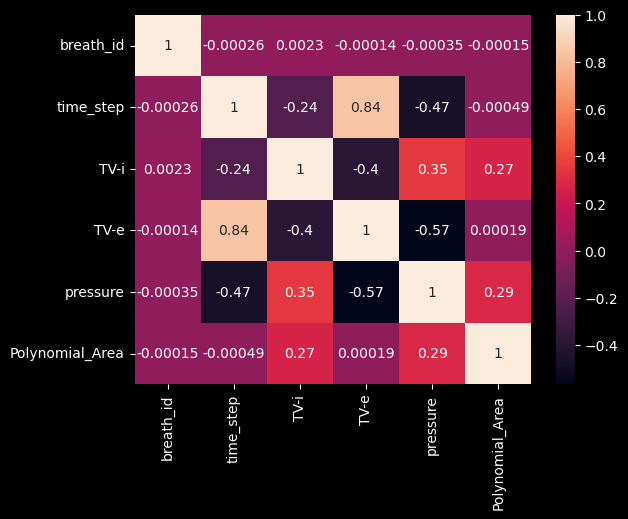

In [28]:
HeatMap(DataSet)

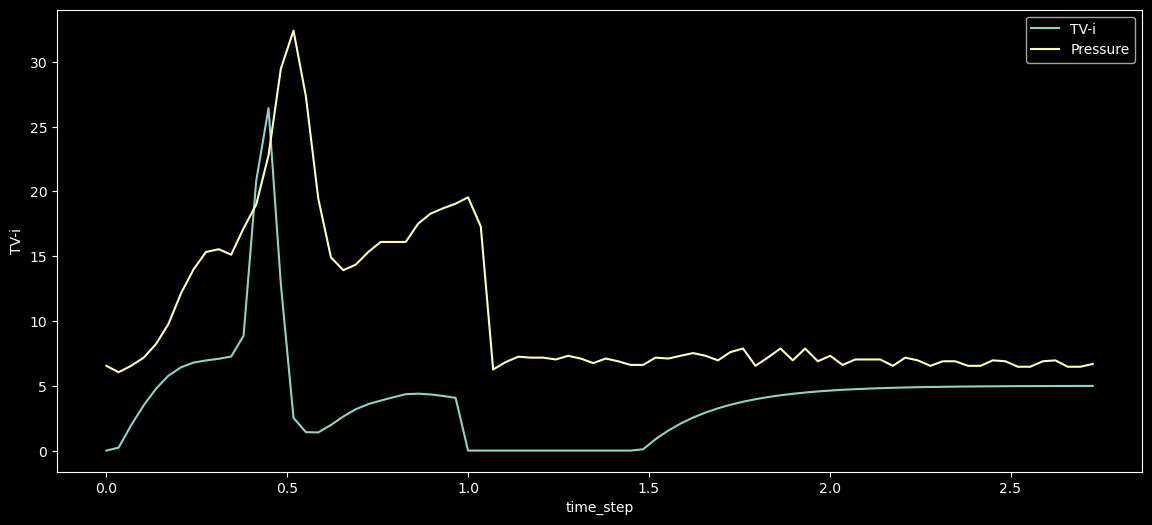

In [42]:
Draw_Feature(DataSet,id_interst[14], "TV-i")

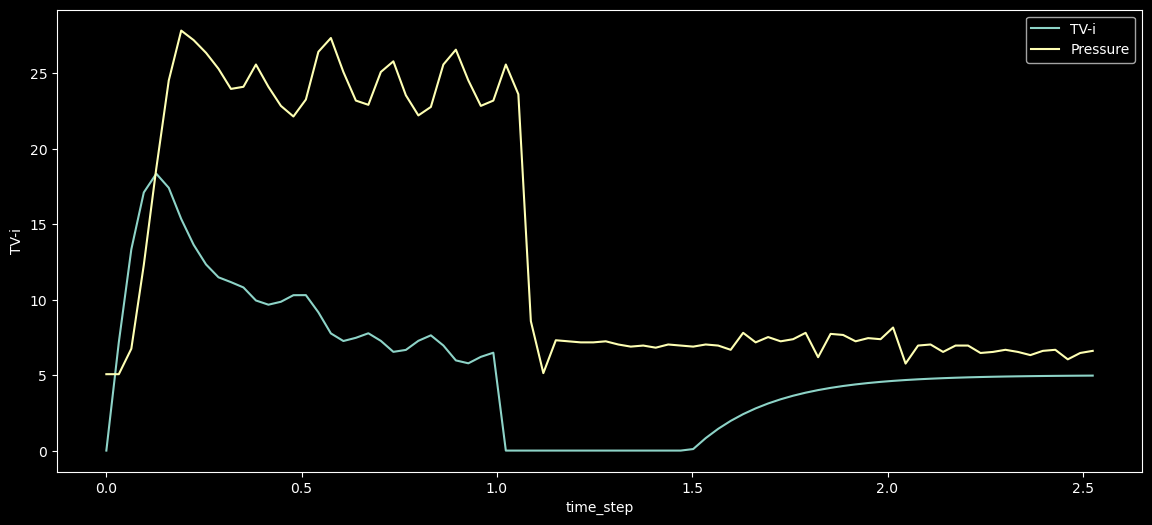

In [8]:
Draw_Feature(DataSet,id_interst[0], "TV-i")


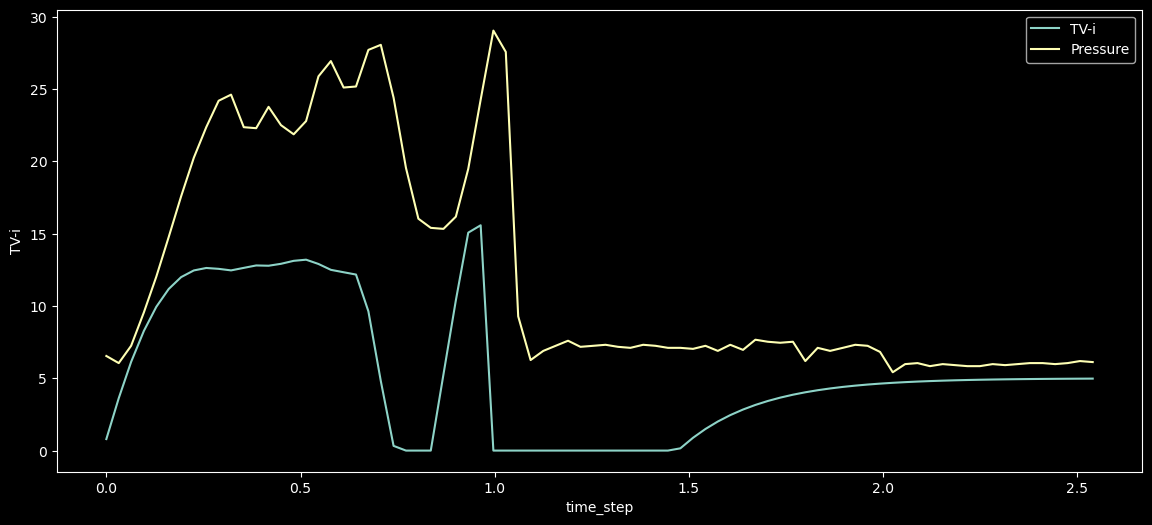

In [47]:
Draw_Feature(DataSet,id_interst[21], "TV-i")


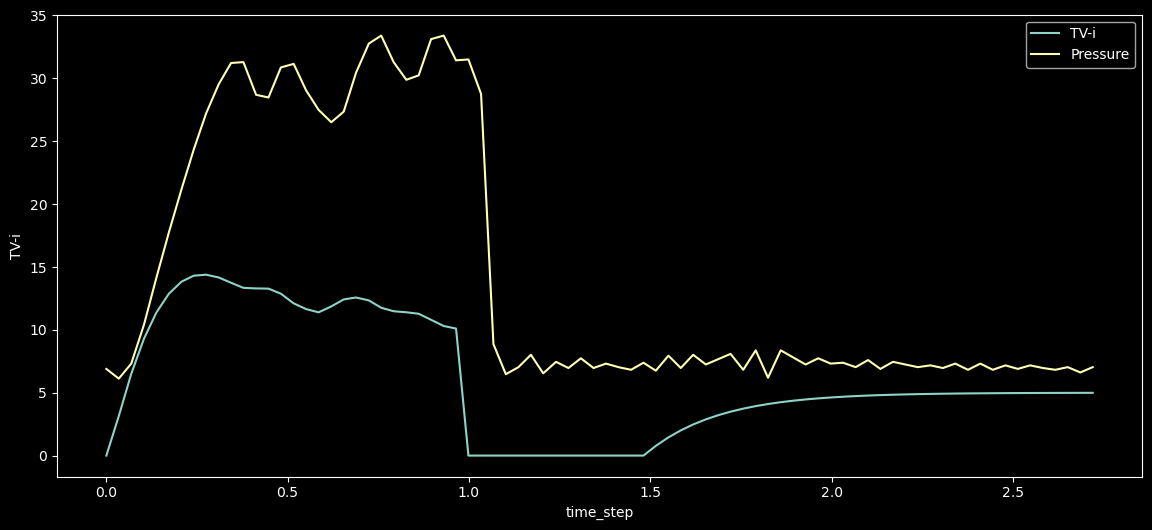

In [49]:
Draw_Feature(DataSet,id_interst[26], "TV-i")


In [196]:
DataSet = pd.read_csv("ClusterSet_26Hz.csv")

id_interst = [ 
    3, 4, 7, 89, 104, 135, 154, 163,
    176,189, 190, 204, 219, 231, 258,
    271, 277, 286, 289, 299, 332, 344,
    4447, 13992, 23994, 35788, 45321, 
    57752, 62697, 69220, 69433, 79073
]

Double Async: 4, 7, 135, 286,!289, !299, !344
Failed triggering: 89, 163, 187,69213
Reverse triggering: 
Normal breath: 154, 23991, 57752

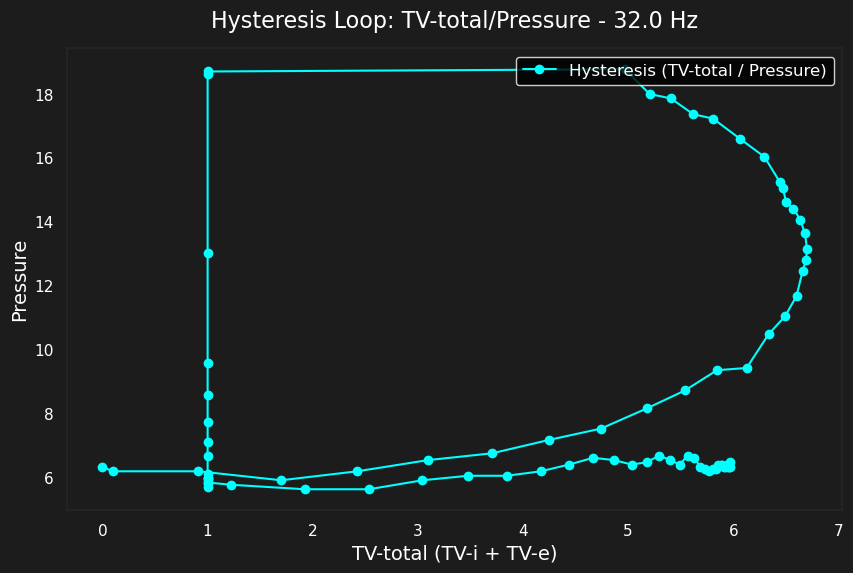

In [479]:

Draw_Reconstructed_Cycles(8240, DataSet)

In [103]:
DataSet.head()

,breath_id,time_step,TV-i,TV-e,pressure,Polynomial_Area
0,1.0,0.000000,0.083334,0.0,5.837492,272.354053
1,1.0,0.033652,18.383041,0.0,5.907794,272.354053
2,1.0,0.067514,22.509278,0.0,7.876254,272.354053
3,1.0,0.101542,22.808822,0.0,11.742872,272.354053
4,1.0,0.135756,25.355850,0.0,12.234987,272.354053


In [128]:
'''Order:
1. x3 Normal
2. x3 Double Trigger
3. x3 Failed Trigger

'''
os.chdir("/home/molderon/Desktop")

Example_Cycles = pd.concat([
    DataSet[DataSet['breath_id'] == 154],
    DataSet[DataSet['breath_id'] == 23991],
    DataSet[DataSet['breath_id'] == 57752],
    DataSet[DataSet['breath_id'] == 289],
    DataSet[DataSet['breath_id'] == 299],
    DataSet[DataSet['breath_id'] == 344],
    DataSet[DataSet['breath_id'] == 69213],
    DataSet[DataSet['breath_id'] == 187],
    DataSet[DataSet['breath_id'] == 163]
], ignore_index=True)

Example_Cycles.drop(Example_Cycles.columns[[5]], axis=1, inplace=True)
Example_Cycles.to_csv("Raw_Demonstrative.csv")

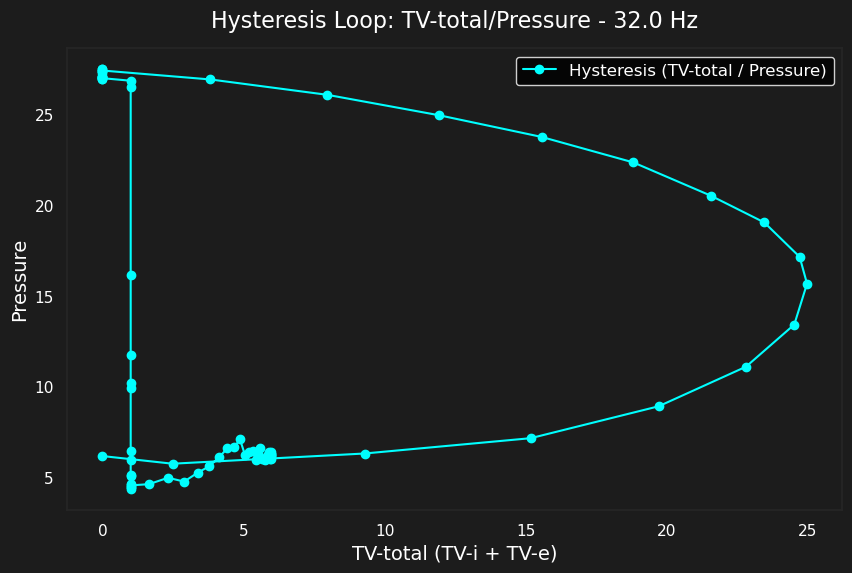

In [131]:
Draw_Reconstructed_Cycles(57752, Example_Cycles)